# Wavelet decomposition

http://people.maths.ox.ac.uk/vary/teaching/ProblemSheet2.html

In [24]:
#numpy: manipulation de vecteurs/matrices...
import numpy as np

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
import matplotlib.image as mpimg
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.sans-serif'] = ['Lucida Grande', 'Verdana']
mpl.rcParams["figure.autolayout"] = True
from matplotlib.ticker import MaxNLocator
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 ))

#fonction math
import math
# PyWavelets
import pywt

In [25]:
def f(x):
    res = 2 * np.sin(6*np.pi*x)+15*np.abs(x-0.1)**0.2 -15*np.abs(x-0.8)**0.4 - 14.06*x
    if x>0.5:
        res +=3.
    return res

In [26]:
def thresh_hard_sparse(x, k):
    """
    Keep only k largest entries of x and return their indices.
    Parameters
    ----------
    x : numpy array
        Numpy array to be thresholded
    k : int
        Number of largest entries in absolute value to keep
    Notes
    """
    _x = x.copy()
    ind = np.argpartition(abs(_x), -k, axis=None)[-k:]
    ind = np.unravel_index(ind, _x.shape)
    ind_del = np.ones(_x.shape, dtype=bool)
    ind_del[ind] = False
    _x[ind_del] = 0
    return ind, _x

In [27]:
vf = np.vectorize(f)

Ns = 2**14
ts = np.linspace(0.,1.,Ns,endpoint=False)

xts=vf(ts)
xts_bruit = xts + 0.1 *np.random.randn(Ns)

In [28]:
Ns

16384

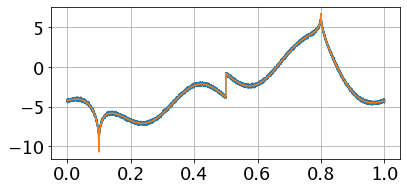

In [29]:
fig = plt.figure(figsize=(6,3))
plt.plot(ts,xts_bruit)
plt.plot(ts,xts)
plt.grid()

In [30]:
wname = "db1"
w = pywt.Wavelet(wname)
maxlvl=pywt.dwt_max_level(data_len=len(xts), filter_len=w.dec_len)
#maxlvl=min(maxlvl,12)


In [31]:
# DECOMPOSITION
coeff = pywt.wavedec(xts_bruit,wname, mode="per" )
coeff_vec, coeff_slices, coeff_shapes = pywt.ravel_coeffs(coeff)

In [32]:
coeff

[array([-344.50010242]),
 array([-282.08567565]),
 array([-86.11693435,  12.89309421]),
 array([  41.29698304,  -84.35069695, -101.12891726,  208.0801001 ]),
 array([ 46.93346093,  20.31285808, -51.84320889,  12.34550394,
          9.90775645, -62.67231222,  86.11103837,  25.27490323]),
 array([  1.33487491,  25.960231  ,   5.41968881,   4.65333999,
        -13.45804932, -20.34277341,  -5.46986322,  13.17011007,
         12.68653998,  -7.11667503, -22.94848313, -19.14711981,
        -13.82697411,  43.74107127,  20.37960689,  -1.14188395]),
 array([ -1.29132278,   2.73408745,  12.71086075, -16.67941458,
         -0.0649843 ,   3.19646582,   2.92326475,   0.33108239,
         -3.07963331,  -6.27816754,  -7.48623669,  -6.44565128,
         -3.97562928,   0.06455494,   3.62859097,   5.53289636,
          5.29128336,   3.35155669,  -0.39344608,  -4.4476456 ,
         -7.37123433,  -8.55200505,  -7.47956596,  -5.71329861,
         -4.27641555,  -1.35223161,  17.59566428,  13.50717983,
      

In [33]:
coeff_vec

array([-3.44500102e+02, -2.82085676e+02, -8.61169344e+01, ...,
       -6.77208319e-04, -1.89035451e-01, -1.44640988e-01])

In [34]:
coeff_slices

[slice(None, 1, None),
 {'d': slice(1, 2, None)},
 {'d': slice(2, 4, None)},
 {'d': slice(4, 8, None)},
 {'d': slice(8, 16, None)},
 {'d': slice(16, 32, None)},
 {'d': slice(32, 64, None)},
 {'d': slice(64, 128, None)},
 {'d': slice(128, 256, None)},
 {'d': slice(256, 512, None)},
 {'d': slice(512, 1024, None)},
 {'d': slice(1024, 2048, None)},
 {'d': slice(2048, 4096, None)},
 {'d': slice(4096, 8192, None)},
 {'d': slice(8192, 16384, None)}]

In [35]:
coeff_shapes

[(1,),
 {'d': (1,)},
 {'d': (2,)},
 {'d': (4,)},
 {'d': (8,)},
 {'d': (16,)},
 {'d': (32,)},
 {'d': (64,)},
 {'d': (128,)},
 {'d': (256,)},
 {'d': (512,)},
 {'d': (1024,)},
 {'d': (2048,)},
 {'d': (4096,)},
 {'d': (8192,)}]

# UTILISATION DES 100 premiers coeff

In [36]:
# UTILISATION DES 100 premiers coeff
n_coeffs = 100
_, coeff_k = thresh_hard_sparse(coeff_vec, n_coeffs)
new_coeff = pywt.unravel_coeffs(coeff_k, coeff_slices, coeff_shapes)
rec_signal = pywt.waverecn(new_coeff,wname, mode = "per")

# plot

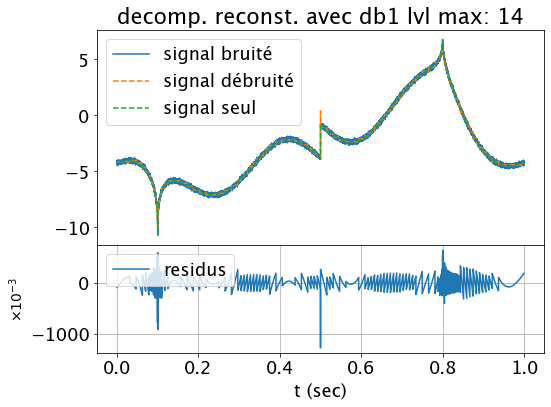

In [37]:
#plot

fig = plt.figure(figsize=(8,6))


gs = plt.GridSpec(2, 1, hspace=0, height_ratios=[1,1/2])



ax0 = fig.add_subplot(gs[0,:])
ax0.plot(ts,xts_bruit, label='signal bruité')
ax0.plot(ts,rec_signal, label='signal débruité', linestyle='--')
ax0.plot(ts,xts, label='signal seul', linestyle='--')
ax0.legend(loc='upper left')
ax0.set_title('decomp. reconst. avec '+wname+' lvl max: '+str(maxlvl))
ax0.set_xticklabels([])
#
#
ax1 = fig.add_subplot(gs[1,:])
ax1.plot(ts,xts-rec_signal,label='residus')
ax1.legend(loc='upper left')
ax1.ticklabel_format(axis='y',style='sci',scilimits=(-3,-3))
ax1.yaxis.get_offset_text().set_visible(False)
#ax1.set_ylim([-10**(-6),10**(-6)])
ax1.set_xlabel("t (sec)")
ax1.set_ylabel(r"$\times 10^{-3}$", fontsize=14)
ax1.grid()
plt.show()




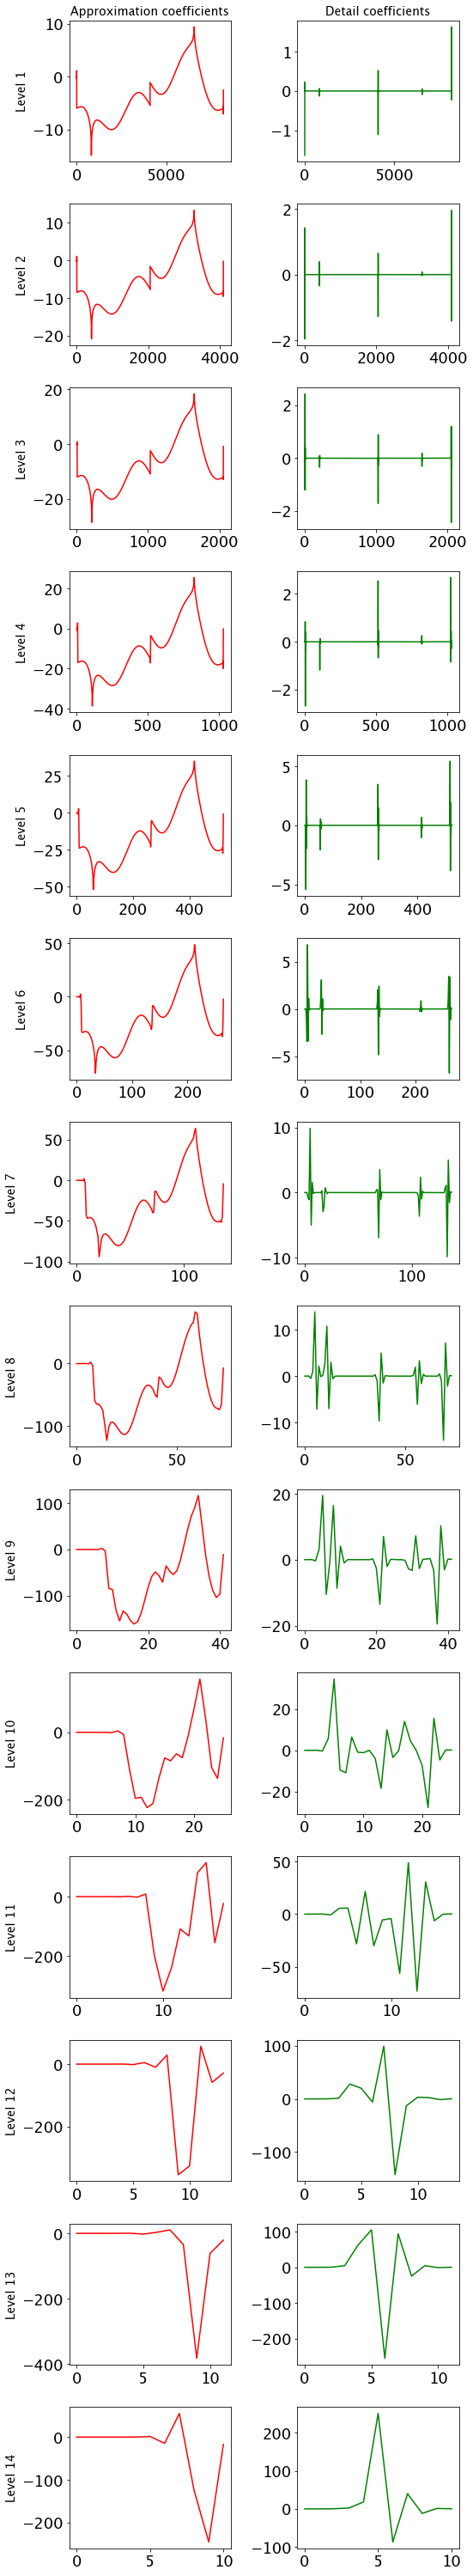

In [38]:
w = pywt.Wavelet("db1")
data = xts

# number of levels
maxlvl=pywt.dwt_max_level(data_len=len(data), filter_len=w.dec_len)

fig, axarr = plt.subplots(nrows=maxlvl, ncols=2, figsize=(8,3*maxlvl))

# loop on levels
for ii in range(maxlvl):
    (data, coeff_d) = pywt.dwt(data, 'db6', mode='zero')
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
#    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
#    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show() 